# Manifold Learning with t-SNE


Manifold Learning algorithms are frequently used for visualization of high dimensional datasets. It allows for more complex dimension mapping. Let's see an example with the digits dataset.

## Plotting the digits dataset

The digits dataset has 64 features (dimensions), so that, it is impossible to plot this data. Here we'll use PCA and t-SNE to reduce its dimension from 64 to 2 dimensions.

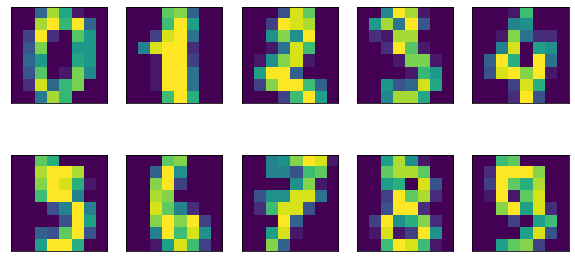

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Above is a sample of the digits dataset. As you can notice, the dataset is composed of handwritten digit images.

### Dimensionality Reduction with PCA

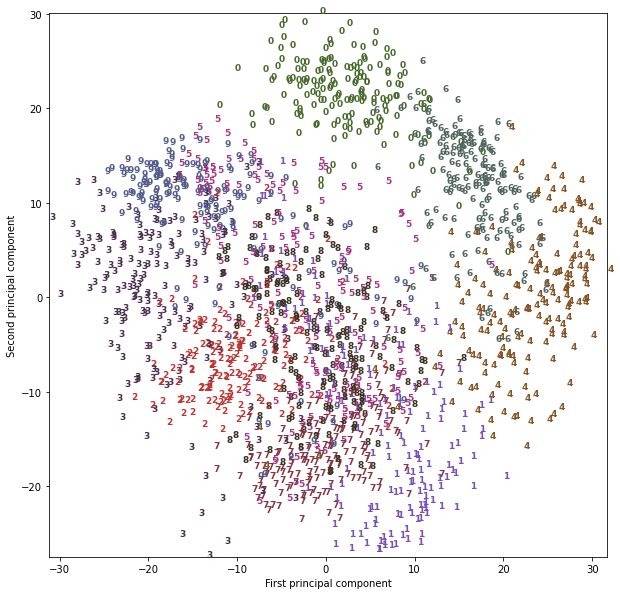

In [4]:
from sklearn.decomposition import PCA

# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)

# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("First principal component")
plt.ylabel("Second principal component");

With PCA, we're able to reduce the dimension of the dataset to 2-d, but the data overlap a lot.

### Dimensionality Reduction with t-SNE

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

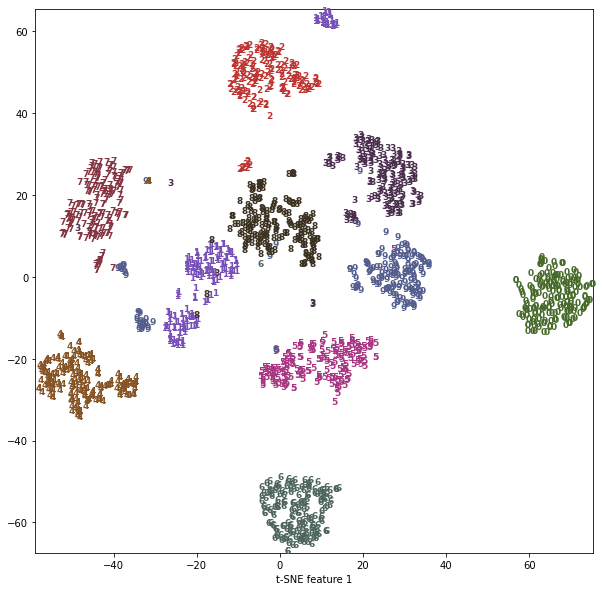

In [7]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1");

t-SNE does an excellent job in this dataset. Using t-SNE to reduce datasets dimension practically solves the problem of identifying the handwritten number. t-SNE has some tuning parameters, but works very well with default settings.